## Capomulin: a novel approach for treating the Squamous Cell Carcinoma

Capomulin, a new drug candidate from Pymaceuticals Inc., has demonstrated promising anti-tumor effect in treating the squamous cell carcinoma (SCC) from the most recent animal study. 

In this 45-day treatment comparison study, a total of 248 SCC mice (sex balanced, Figure 1) have been used to evaluate the anti-tumor effect of Capomulin with placebo and 8 other different drug regimens (24 to 25 mice per treatment group). The starting tumor volume for each mouse was 45 cubic millimeter (mm3). Remaining tumor volume was measured every 5 days throughout the treatment course, returning over one hundred number of measurements for each drug regimen group (Figure 2). Moreover, age, sex, weight and metastatic site(s) of each mouse have also been recorded for future analyses.

##### Figure 1
<img src="Images/sex_distribution.png"> 

##### Figure 2
<img src="Images/total_measurements.png">

To compare the anti-tumor effect of Capomulin with Ramicane, Infubinol, and Ceftamin specifically, final tumor volume of each mouse in these four regimen groups was determined. As shown in Figure 3, while the final treatment outcomes were comparable between Capomulin and Ramicane regimen groups, mice treated by Capomulin exhibited significantly reduced final tumor volumes/sizes than mice treated by Infubinol and Ceftamin. The decrease of tumor volume/size over time from a representative mouse in the Capomulin regimen group is shown in Figure 4. Further analyses such as the survival and metastatic status are required to assess the overall effect and toxicity of Capomulin in treating SCC.

##### Figure 3
<img src="Images/regimen_comparison.png">

##### Figure 4
<img src="Images/capomulin_representative.png">

Of note, analysis between mouse weight and average tumor volume highlighted a linear correlation between these two variables (Figure 5). The calculated correlation coefficient between them is 0.84, suggesting that it is a strong correlation.

##### Figure 5
<img src="Images/tumor_vol_vs_mouse_weight.png">

## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = combined[combined.duplicated(['Mouse ID','Timepoint'])]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined.loc[combined['Mouse ID']=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = combined.loc[combined['Mouse ID']!="g989",:]
combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
combined_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_groupby = combined_clean.groupby('Drug Regimen')
tumor_vol_mean = round(drug_groupby['Tumor Volume (mm3)'].mean(),2)
tumor_vol_median = round(drug_groupby['Tumor Volume (mm3)'].median(),2)
tumor_vol_var = round(drug_groupby['Tumor Volume (mm3)'].var(),2)
tumor_vol_std = round(drug_groupby['Tumor Volume (mm3)'].std(),2)
tumor_vol_sem = round(drug_groupby['Tumor Volume (mm3)'].sem(),2)

summary_df = pd.DataFrame({"Mean":tumor_vol_mean,
                           "Median":tumor_vol_median,
                           "Variance":tumor_vol_var,
                           "Standard Deviation":tumor_vol_std,
                           "Standard Error":tumor_vol_sem
})
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_df_2 = drug_groupby['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']).round(2)
summary_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Check how many mice per treatment group
drug_groupby['Mouse ID'].nunique()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [10]:
# Check the time points used for the study
combined_clean['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

## Bar and Pie Charts

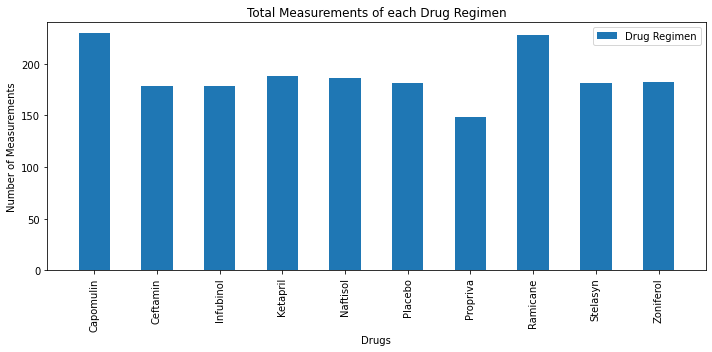

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements = drug_groupby['Mouse ID'].count()

fig,ax = plt.subplots()

drug_measurements.plot(kind='bar', width=0.5, figsize=(10,5), label='Drug Regimen')

ax.legend()
ax.set_title("Total Measurements of each Drug Regimen")
ax.set_xlabel("Drugs")
ax.set_ylabel("Number of Measurements")
ax.set_xlim(-0.75, combined_clean['Drug Regimen'].nunique()-0.25)
ax.set_ylim(0, max(drug_measurements)+10)

plt.tight_layout()
plt.show()

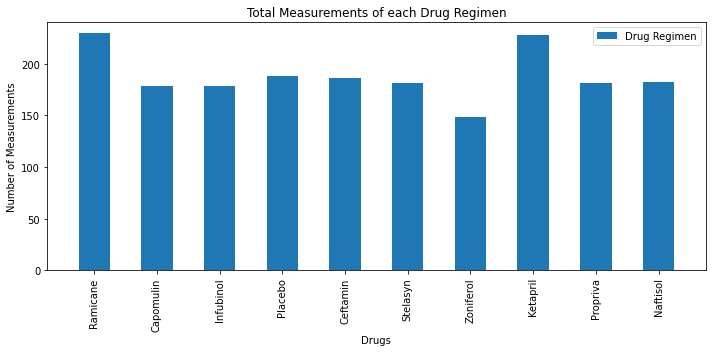

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drugs = np.arange(0,combined_clean['Drug Regimen'].nunique())

plt.figure(figsize=(10,5))
plt.bar(drugs, drug_measurements, width=0.5, label='Drug Regimen')

tick_locations = [drug for drug in drugs]
plt.xticks(tick_locations, combined_clean['Drug Regimen'].unique(), rotation='vertical')

plt.legend()
plt.title("Total Measurements of each Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Number of Measurements")
plt.xlim(-0.75, combined_clean['Drug Regimen'].nunique()-0.25)
plt.ylim(0, max(drug_measurements)+10)

plt.tight_layout()
plt.savefig('Images/total_measurements.png')
plt.show()

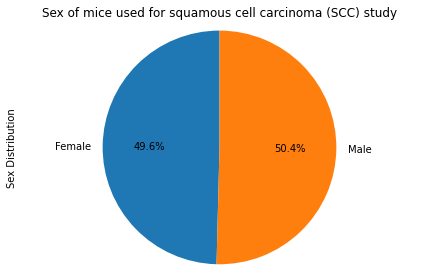

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_groupby = combined_clean.groupby('Sex')
sex_count = sex_groupby['Mouse ID'].nunique()

sex_plot = sex_count.plot(kind='pie', title="Sex of mice used for squamous cell carcinoma (SCC) study", startangle=90, autopct = "%1.1f%%")
sex_plot.set_ylabel("Sex Distribution")

plt.axis("equal")
plt.tight_layout()
plt.show()

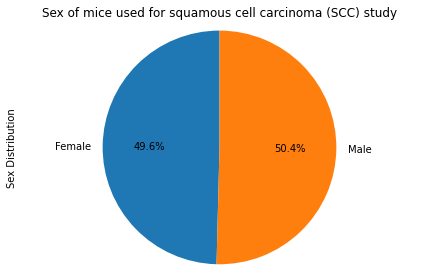

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']

plt.pie(sex_count, labels = labels, startangle=90, autopct = "%1.1f%%")

plt.title("Sex of mice used for squamous cell carcinoma (SCC) study")
plt.ylabel("Sex Distribution")
plt.axis("equal")
plt.tight_layout()

plt.savefig('Images/sex_distribution.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = combined_clean.groupby('Mouse ID')['Timepoint'].max()
last_tp_df = last_tp.to_frame()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_df = pd.merge(last_tp_df, combined_clean, on=['Mouse ID','Timepoint'], how='left')
last_tumor_df = last_tumor_df.set_index('Drug Regimen')
last_tumor_df

,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,45,Female,20,23,67.973419,2
Infubinol,a251,45,Female,21,25,65.525743,1
Placebo,a262,45,Female,17,29,70.717621,4
Ceftamin,a275,45,Female,20,28,62.999356,3
Stelasyn,a366,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...
Propriva,z435,10,Female,12,26,48.710661,0
Ramicane,z578,45,Male,11,16,30.638696,0
Infubinol,z581,45,Female,24,25,62.754451,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
last_tumor_vol = []
for drug in treatments:
    last_tumor_vol.append(last_tumor_df.loc[drug,'Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

Capomulin = last_tumor_vol[0]
Ramicane = last_tumor_vol[1]
Infubinol = last_tumor_vol[2]
Ceftamin = last_tumor_vol[3]

    # add subset 
Capomulin_Ramicane =  Capomulin.add(Ramicane,fill_value=0)
Capomulin_Ramicane_Infubinol = Capomulin_Ramicane.add(Infubinol,fill_value=0)
total = Capomulin_Ramicane_Infubinol.add(Ceftamin,fill_value=0)

    # Determine outliers using upper and lower bounds

for drug in treatments:
    # subset the dataframe containing only one drug of interest
    drug_df = last_tumor_df.loc[drug,:]
    # Quartiles calculation
    quartiles = total[drug].quantile([.25, .5, .75])
    # IQR calculation
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Outlier boundaries
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print("_________________________________________________________________________________")
    print("")
    print(f"For {drug} Regimen:")
    print("")
    print(f"Tumor Volume larger than {(upper_bound).round(2)}(mm3) or smaller than {(lower_bound).round(2)}(mm3) could be outliers.")  
    print("")
    outlier = drug_df.loc[(drug_df['Tumor Volume (mm3)'] < lower_bound) | (drug_df['Tumor Volume (mm3)'] > upper_bound)]
    if outlier.empty:
        print("* No outlier found in this regimen group.")
    else:
        print("* Outlier(s) found:")
        display(outlier)
    print("_________________________________________________________________________________")

_________________________________________________________________________________

For Capomulin Regimen:

Tumor Volume larger than 51.83(mm3) or smaller than 20.7(mm3) could be outliers.

* No outlier found in this regimen group.
_________________________________________________________________________________
_________________________________________________________________________________

For Ramicane Regimen:

Tumor Volume larger than 54.31(mm3) or smaller than 17.91(mm3) could be outliers.

* No outlier found in this regimen group.
_________________________________________________________________________________
_________________________________________________________________________________

For Infubinol Regimen:

Tumor Volume larger than 82.74(mm3) or smaller than 36.83(mm3) could be outliers.

* Outlier(s) found:


,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,c326,5,Female,18,25,36.321346,0


_________________________________________________________________________________
_________________________________________________________________________________

For Ceftamin Regimen:

Tumor Volume larger than 87.67(mm3) or smaller than 25.36(mm3) could be outliers.

* No outlier found in this regimen group.
_________________________________________________________________________________


Outlier is highlighted in red diamond shape


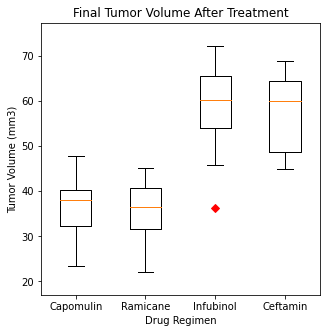

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
print("Outlier is highlighted in red diamond shape")
plt.figure(figsize=(5,5))
plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin], labels=treatments, sym='rD')
plt.title("Final Tumor Volume After Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(min(total)-5, max(total)+5)
plt.savefig('Images/regimen_comparison.png')
plt.show()

## Line and Scatter Plots

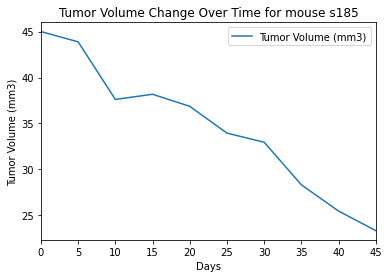

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = combined_clean.loc[(combined_clean['Drug Regimen']=="Capomulin"),['Mouse ID','Timepoint','Tumor Volume (mm3)']]

Capomulin_mice = Capomulin_df.groupby(['Mouse ID','Timepoint'])
Capomulin_mice_sum = Capomulin_mice.sum()

mouseid = 's185'
one_mouse_data = Capomulin_mice_sum.loc[mouseid]
one_mouse_plot = one_mouse_data.plot(title="Tumor Volume Change Over Time for mouse "+mouseid)
one_mouse_plot.set_xlabel("Days")
one_mouse_plot.set_ylabel("Tumor Volume (mm3)")
one_mouse_plot.set_xlim(0,45)
one_mouse_plot.set_ylim(min(one_mouse_data['Tumor Volume (mm3)'])-1, max(one_mouse_data['Tumor Volume (mm3)'])+1)

plt.savefig('Images/capomulin_representative.png')
plt.show()

In [19]:
# Determine the smallest final tumor volume and mouse ID for the above line plot
Capomulin.sort_values()

Drug Regimen
Capomulin    23.343598
Capomulin    28.430964
Capomulin    28.484033
Capomulin    30.485985
Capomulin    31.023923
Capomulin    31.896238
Capomulin    32.377357
Capomulin    33.329098
Capomulin    34.455298
Capomulin    36.041047
Capomulin    37.074024
Capomulin    37.311846
Capomulin    38.125164
Capomulin    38.753265
Capomulin    38.846876
Capomulin    38.939633
Capomulin    38.982878
Capomulin    39.952347
Capomulin    40.159220
Capomulin    40.658124
Capomulin    40.728578
Capomulin    41.483008
Capomulin    41.581521
Capomulin    46.539206
Capomulin    47.685963
Name: Tumor Volume (mm3), dtype: float64

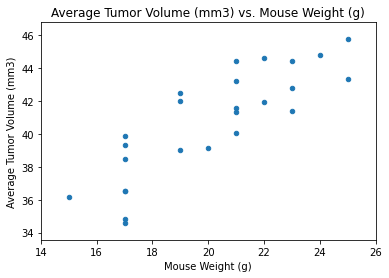

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_df_2 = combined_clean.loc[(combined_clean['Drug Regimen']=="Capomulin"),['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
Capomulin_df_2

Capomulin_weight = Capomulin_df_2.groupby('Mouse ID')
Capomulin_weight_mean = Capomulin_weight.mean()

tumor_vs_weight=Capomulin_weight_mean.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', title="Average Tumor Volume (mm3) vs. Mouse Weight (g)")

tumor_vs_weight.set_xlabel("Mouse Weight (g)")
tumor_vs_weight.set_ylabel("Average Tumor Volume (mm3)")
tumor_vs_weight.set_xlim(min(Capomulin_weight_mean['Weight (g)'])-1, max(Capomulin_weight_mean['Weight (g)'])+1)
tumor_vs_weight.set_ylim(min(Capomulin_weight_mean['Tumor Volume (mm3)'])-1, max(Capomulin_weight_mean['Tumor Volume (mm3)'])+1)
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(Capomulin_weight_mean['Weight (g)'],Capomulin_weight_mean['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


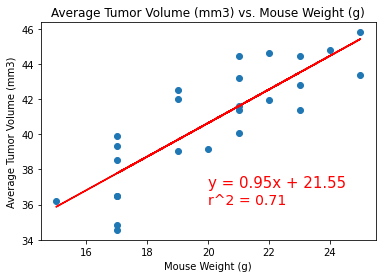

In [22]:
# fit the linear regression trendline and equation to the data

x_values = Capomulin_weight_mean['Weight (g)']
y_values = Capomulin_weight_mean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37), fontsize=15,color="red")
plt.annotate("r^2 = 0.71", (20,36), fontsize=14,color="red")
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight (g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig('Images/tumor_vol_vs_mouse_weight.png')
plt.show()